In [44]:
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import torch as nn
from torch.autograd import variable

In [45]:
df = pd.read_csv("data/IRIS_ Flower_Dataset.csv")
df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


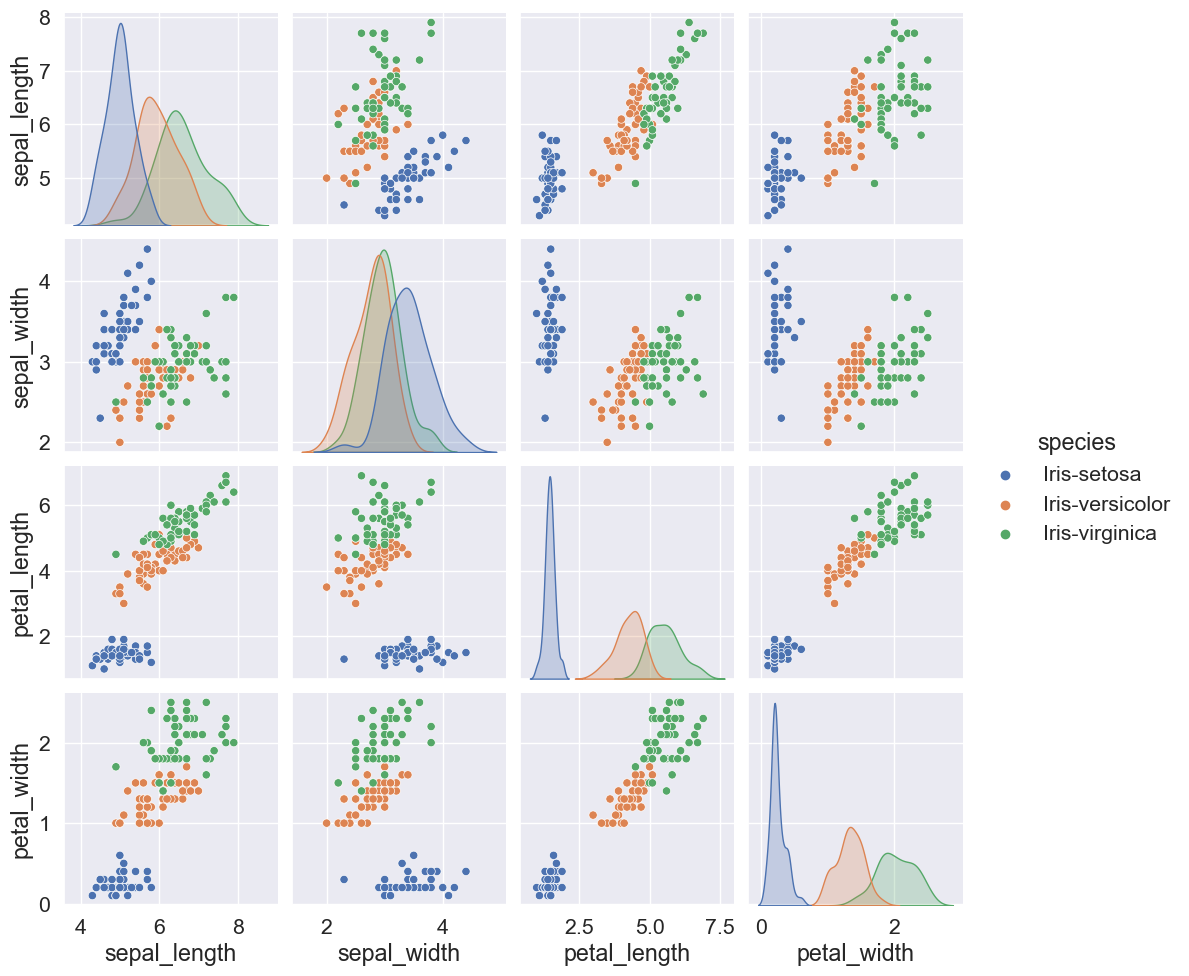

In [46]:
sns.pairplot(df,hue="species")#plot of every point with a color for every class of flower

In [47]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score,f1_score
from sklearn.preprocessing import StandardScaler
#classification of the plant with support vector machine
def classification2(X,Z):
    #reformat of the input
    sc = StandardScaler()
    X = sc.fit_transform(X)
    #devide the datatset in two part one part use for the training and the other one for the testing of the algorithm
    x_train,x_test, label_train,label_test = train_test_split(X,Z,test_size=0.3)
    label_train = label_train.values.reshape(-1,1)
    label_test = label_test.values.reshape(-1,1)
    #training of the algorithm
    Train = SVC(kernel="linear",C=10)
    Train.fit(x_train,label_train) 
    return Train,x_test,label_test

In [48]:
training,x_test,label_test = classification2(df[['petal_length','petal_width','sepal_length','sepal_width']],df['species'])
#prediction given by the algorithm
prediction = training.predict(x_test)
#display of the prediction given
print(prediction)

['Iris-versicolor' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa'
 'Iris-virginica' 'Iris-setosa' 'Iris-versicolor' 'Iris-virginica'
 'Iris-versicolor' 'Iris-versicolor' 'Iris-setosa' 'Iris-versicolor'
 'Iris-versicolor' 'Iris-setosa' 'Iris-virginica' 'Iris-virginica'
 'Iris-setosa' 'Iris-virginica' 'Iris-setosa' 'Iris-virginica'
 'Iris-setosa' 'Iris-virginica' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa'
 'Iris-setosa' 'Iris-setosa' 'Iris-virginica' 'Iris-virginica'
 'Iris-setosa' 'Iris-versicolor' 'Iris-versicolor' 'Iris-setosa'
 'Iris-versicolor' 'Iris-versicolor' 'Iris-versicolor' 'Iris-virginica'
 'Iris-versicolor' 'Iris-setosa' 'Iris-virginica' 'Iris-setosa'
 'Iris-setosa' 'Iris-versicolor' 'Iris-virginica']


c:\Users\ihadi\miniconda3\envs\VENV\Lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [49]:
#reformat the label array in a 1D array format
def reformatoutput(y):
    newlabeltest = np.empty(0)
    for i in range(0,len(y)):
        newlabeltest = np.append(newlabeltest,y[i][0])
    return newlabeltest

newlabeltest = reformatoutput(label_test)

In [50]:
from sklearn.metrics import f1_score,log_loss,classification_report
print(classification_report(newlabeltest,prediction))
print(len(prediction))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        20
Iris-versicolor       1.00      1.00      1.00        13
 Iris-virginica       1.00      1.00      1.00        12

       accuracy                           1.00        45
      macro avg       1.00      1.00      1.00        45
   weighted avg       1.00      1.00      1.00        45

45


<Axes: >

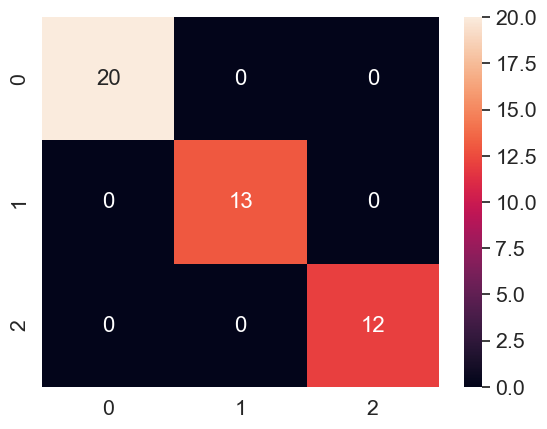

In [51]:
import seaborn as sns
from sklearn.metrics import confusion_matrix, f1_score
conf = confusion_matrix(newlabeltest,prediction)
df_cm = pd.DataFrame(conf, range(3), range(3))
# plt.figure(figsize=(10,7))
sns.set(font_scale=1.4) # for label size
sns.heatmap(df_cm, annot=True, annot_kws={"size": 16}) # font size